# <span style="color: Steelblue"> Arrays, dataframes, and plotting </span>
## <span style="color: Steelblue"> A short primer on Numpy, Pandas, and Matplotlib </span>

>Jupyter Notebook: **'Arrays, dataframes & plotting with Python'**

>Goal: first steps with Numpy, Matplotlib & Pandas

>By: H.J. Megens

>Where you can reach me: hendrik-jan.megens -at- wur.nl

>Last modified: 26 September 2017

## Arrays and basic Numpy

Arrays are one-dimensional (vectors), two-dimensional, or multidimensional datastructures that hold data. One characteristic of arrays is that they only hold one type of data (usually numerical, either int or float, but strings work too). Numpy has a specialized package for working with numerical array data, called Numpy. Numpy is extremely efficient in working with numerical data and has many built-in methods for mathematical operations. Numpy is one of the major reasons Python has become very important in the 'Data Analytics' wave, also known as 'Big Data' revolution, and sometimes referred to as 'machine learning'. Here you will briefly explore a few characteristics of Numpy.

### Basic properties of vectors and arrays


In [1]:
# Cell #1
# First we import the numpy module
import numpy as np # accepted convention of importing numpy

In [2]:
# Cell #2
# How to make a numpy array ...
# ... or rather a 1-dim vector
a = np.array([1,2,3])
print(a)  # see what it contains
print(a.dtype) # see what datatype the array is

[1 2 3]
int64


In [3]:
# Cell #3
# an another one...
b = np.array([4,5,6])
b

array([4, 5, 6])

In [4]:
# Cell #4
# doing simple mathematical operations is easy-peasy.
a + b

array([5, 7, 9])

In [5]:
# Cell #5
# Just note how different this behavior is from working with normal lists:
a_list = [1,2,3]
b_list = [4,5,6]
a_list + b_list

[1, 2, 3, 4, 5, 6]

In [6]:
# Cell #6
# Concatenating matrices or vectors
# This is an example of a so-called 'vertical-stack'
# Other options are 'hstack' - horizontal - and 'dstack'
c = np.vstack((a,b))

In [7]:
# Cell #7
# show contents of c
c

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
# Cell #8
# get the value of the first row, and second column
c[0,1]

2

In [9]:
# Cell #9
# Notice the difference between retrieving elements from
# simple lists in simple lists
c_list = [[1,2,3],[4,5,6]]
# In this case you need to go 'one deeper' into the list
c_list[0][1]

2

In [10]:
# Cell #10
# various mathematical operations can be applied to matrices
# for instance squaring
d = c**2

In [11]:
# Cell #11
# d is again a 3x2 array, now containing the squared values of c
d

array([[ 1,  4,  9],
       [16, 25, 36]])

In [12]:
# Cell #12
# 'd' is a numpy array object, which has several built-in methods, such
# as summing the values
d.sum()

91

In [13]:
# Cell #13
# larger then?
d > 20

array([[False, False, False],
       [False,  True,  True]], dtype=bool)

In [14]:
# Cell #14
# You can change values in an array
d[0,1] = 21
d

array([[ 1, 21,  9],
       [16, 25, 36]])

In [15]:
# Cell #15
# Which ones now larger than 20?
d > 20

array([[False,  True, False],
       [False,  True,  True]], dtype=bool)

### Selecting elements from arrays based on logic values - True or False?

Assume you would like to slice a list based on an arbitrary list that simply states 'select yes-or-no'. You could try something like this:

In [16]:
# Cell #16

mylist = ['a','b','c','d']
my_logic_list = [False,True,True,False]
mylist[my_logic_vector]


NameError: name 'my_logic_vector' is not defined

... but that doesn't work for the standard Python lists, in fact the only way to extract locations from a string or list is to use slices. In this case, because the elements we want to extract are adjacent, we could do the following, but in case the elements you want to select are not adjacent, that won't work.

In [17]:
# Cell 17
mylist[1:3]

['b', 'c']

With numpy arrays/vectors, you can select an arbitrary selection of elements, based on supplying a vector (or array) of similar dimensions that contains Booleans `True` or `False` in the order of elements to be selected, or not selected. For instance:

In [18]:
# Cell 18
myvec = np.array(['a','b','c','d'])
my_logic_vector = np.array([False,True,True,False])
myvec[my_logic_vector]

array(['b', 'c'], 
      dtype='|S1')

Just to note, Numpy arrays can be transformed to standard Python lists, and vice versa. For instance:

In [19]:
# Cell 19
selection = list(myvec[my_logic_vector])
selection

['b', 'c']

You might wonder: "So what?". What's so great about this type of selecting elements in a vector or array. Well, consider this example, where you might be interested in selecting only the numbers in the array that are larger than 8:

In [20]:
# Cell 20
myvec = np.array([10, 5.0, 7, 15])
myvec > 8

array([ True, False, False,  True], dtype=bool)

The code above results in an array, of data type Boolean. First and last elements are indeed larger than 8, the two middle ones are not. This Boolean array can subsequently be passed back into the original array (or vector) to then only show the elements that are `True`.

In [21]:
# Cell 21
myvec[myvec>8]

array([ 10.,  15.])

Note that all elements are of type float. You can't mix types in a Numpy array, we'll come back to that in the section 'Dataframes'. 

You can also construct composite logical expressions, for instance:

In [22]:
# Cell 22
myvec[(myvec > 8) & (myvec < 12)]

array([ 10.])

As before, this works because of the Boolean vector created by the two tests: number larger than 8 `AND` smaller than 12. 

In [23]:
# Cell 23
(myvec > 8) & (myvec < 12)

array([ True, False, False, False], dtype=bool)

## The *Iris* dataset

![iris species](iris_species.jpg)
The *Iris* dataset is one of the classic biological datasets, created by the famous geneticist R.A. Fisher. The data is derived from measurements on flowers of three *Iris* species: *I. versicolor*, *I. setosa*, and *I. virginica*. The dataset contains four measurements per flower: sepal length and width, and petal length and width.

![Iris flower](Iris_flower.jpg)

The data set is often used to demonstrate or benchmark machine-learning techniques. For more information on the *Iris* dataset, visit the <a href=https://en.wikipedia.org/wiki/Iris_flower_data_set>Wikipedia page</a>.

Because the *Iris* data set is small, and often used for demonstrating machine learning techniques, it is often bundled in analytical packages for languages often used in data science, such as R and Python. In Python, the most used package for machine learning is the Scikit-learn package. 

We will first load the dataset and explore some of its properties. 

In [24]:
# Cell 22

import numpy as np  # import numpy
from sklearn import datasets # import the 'datasets' 
iris = datasets.load_iris()

The Scikit-Learn data packages have a specific structure which you don't need to remember. However, you can always use the `dir()` function on any object to investigate which methods are available. For now, we will focus on the `.keys()` method, which tells us that the datastructure is a bit like a dictionary.

In [25]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

You will see the different 'items' in the data package. Let's explore them. One is called 'DESCR', and hold a description of the data package. Curious what it has to say? Just do:

In [26]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Note the absence of parenthesis, because iris.DESCR is a data structure, not a method (function built-in the method).

This is a nice overview of the data. The data is derived from three species of *Iris*: *I. setosa*, *I.versicolor*, and *I. virginica*. These names can also be found in the `iris.target_names`:

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In total, 150 flowers were measured, 50 for every species. The order of the species in the actual data array is given by the `iris.target` vector. 

In [28]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


### Optional: Euclidean distance.

The differences between the 150 flowers in the dataset are defined by four measurements. Together, these four numbers can be used to calculate the overall difference between flowers. Differences are often calculated by some 'distance' measure, of which the Euclidean distance is conceptually the simplest and easiest to understand. The Euclidean distance is, as you might have guessed, indeed the geometric distanc between two points, that are defined by coordinates in n-dimensional space. For this dataset, `n=4`. Calculating Euclidean distance you've all done at some time in your past, just think about the <a href=https://en.wikipedia.org/wiki/Pythagorean_theorem>Pythagorean Theorum</a>: 

$c^2 = a^2 + b^2$

Where c is the length of the hypotenuse.

Consider the following example, derived from the *Iris* dataset, for only sepal length and width.

![Euclidean_dist_explained](Euclidean_dist_example.jpg)


We have to obtain the lengths of the two sides connecting at the right angle of the imaginary triangle. Simply subtract the 'x' values of, for instance, the blue and green dot to obtain the length of the horizontal side, and the 'y' values to obtain the length of the vertical side. Doesnt' matter in which order you do this - in case you get a negative number, it's all about the difference and the values get squared anyway. The squares then get summed, and finally the square root is taken:

$\begin{equation}dist_{blue-green} = \sqrt{(x_{blue}-x_{green})^2 + (y_{blue}-y_{green})^2}\end{equation}$

For the example the values are:

$\begin{equation}dist_{blue-green} = \sqrt{(5.8-4.6)^2 + (2.7-3.1)^2}\end{equation}$

Again, you can do this with as many features as you like, whether you have 4 or 4 million measurements, the principle is the same.

In Numpy, you can very easily perform this trick by subtracting the vectors for each individual (vector of length 4 in the Iris dataset). The resulting vector can then be squared, sum of that vector then taken, and that sum need needs to have the square root taken. Voila...



## Plotting with Matplotlib
### A very short primer on Matplotlib

In this section we will explore a few basic properties of Matplotlib and demonstrate how you can make nice figures by just a limited number of lines of code. One of the added learning goals is to explore the extensibility of the Matplotlib code. By adding figure titles, legends, axis labels, and by modifying color and other features of plotted lines and dots, you can make beautiful, publishing grade figures tailored to your needs, and, importantly, automate it without much additional effort.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Our first demonstration will be on a well-known mathematical operation: taking the sine and cosine of a bunch of values, and then plot the x and y values. For this we first need to have a vector of 'x-coordinates'. Numpy has a neat little function for that, called 'linspace'. The next line of code will produce 100 values between zero and ten, evenly spaced:

In [30]:
x = np.linspace(0,10,100)
x

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

Matplotlib supports different coding styles. This can become a bit confusing, so we will only show one today, which is also the one that is most often used. It is in line with the 'Matlab' way of plotting. This is not surprising as <a href=https://en.wikipedia.org/wiki/MATLAB>Matlab</a> has inspired the Python Matplotlib makers. There is also a more 'Pythonesque' way of doing it, which has a number of advantages, but you will see that slightly less often in coding examples (although Matplotlib developers appear to <a href=http://matplotlib.org/faq/usage_faq.html#coding-styles>encourage the object, Python way</a>).

The general procedure is as follows: open an 'active' figure. This is usually not strictly necessary in Matlab style, but has a few advantages. First, it explicitly delineates the active plot. And second it allows to modify canvas properties. After activating a canvas, you can add a number of plotting statements, and add other features. After all the elements are added to the active plot, you can display it (or write it to a file).

**a)** In the first exercise you will add more features. You can do this by removing the `#` in front of a line of code, or swapping out lines. Eacht time, run the cell, and see what changes. Note also the syntax to define line style and color. 'b' is blue, 'g' is green, and 'r' is red. There are many more. What does '--' do?

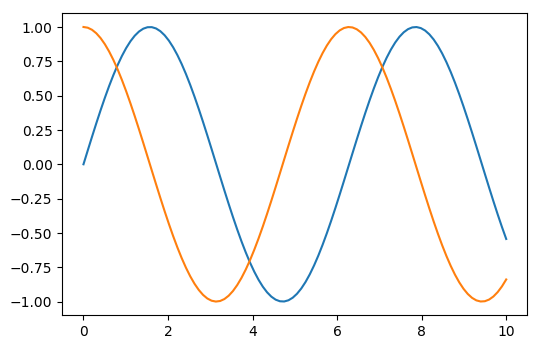

In [31]:
# a
plt.figure() # create figure

plt.plot(x,np.sin(x)) # basic plotting function
plt.plot(x,np.cos(x)) # basic plotting function
# replace these two lines by:
# plt.plot(x,np.sin(x), 'r')   # you can modify colors
# plt.plot(x,np.cos(x), '--b') # and line patterns
# and then replace these in turn by:
# plt.plot(x,np.sin(x), 'b',label = 'sin') # 'label' is shown by plt.legend()
# plt.plot(x,np.cos(x), '--g', label = 'cos') # 'label' is shown by plt.legend()

# Then, one by one, add these lines. Observe and report differences.
# plt.xlim((-1,11))       # change the default limits of the plot, horizontal direction
# plt.ylim((-1.2,1.2))    # change the default limits of the plot, vertical direction
# plt.title('This is my title') # add a title to the plot
# plt.xlabel('X')  # add label for x-axis
# plt.ylabel('Y')  # add label for y-axis
# plt.legend() # when activating this, make sure that 'label' is added to plot function!
plt.show() # finally: display

## Optional - exploring the Python powertools for powerful data analysis

Python has many powerful modules for data analysis, from doing generic statistical analysis, to very specific bioinformatics or numerical manipulations. Examples are BioPython (Python for Bioinformatics), SciPy (Scientific Python), and SciKitLearn, which contains many machine learning tools. All of these rely heavily on Numpy, which in itself already contains many options for mathematical analysis. 

Here we will show you two examples. These examples have two main learning goals:
- Demonstrate the use of Python for numerical analysis
- Show how you can implement these tools in your own project

### Basic regression analysis - tutorial

Chances are that you have done some basic statistics in other courses, and may even have applied some of these in programs such as excel. Python has many tools for doing basic mathematical operations, including statistics. In this example we will compute the correlation coefficient, and the slope and intercept of the regression line. We will then plot the values but also the fitted line. 

['setosa' 'versicolor' 'virginica']
Correlation coefficient: 0.53


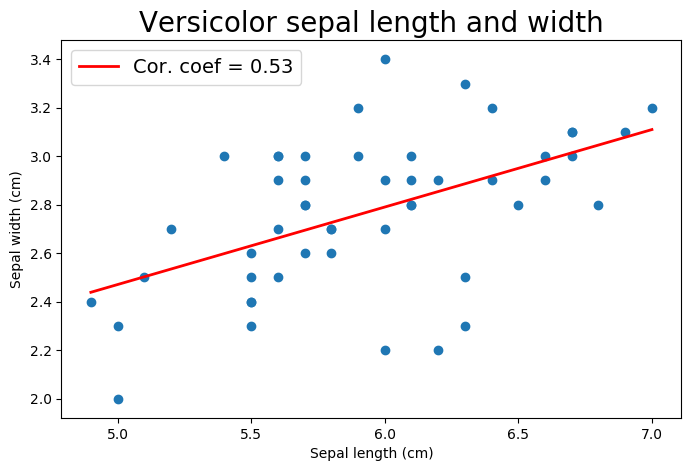

In [32]:
print(iris.target_names)

# some code to extract sepal length and width for only versicolor
versicolor = iris.target == 1
versicolor_data = iris.data[versicolor,:]
versicolor_sepal_length = versicolor_data[:,0]
versicolor_sepal_width = versicolor_data[:,1]

# calculate correlation coefficient
cf = np.corrcoef(versicolor_sepal_length, versicolor_sepal_width)[0,1]
print('Correlation coefficient: %.2f' % (cf))

# and calculate the slope and intercept of the linear regression line
slope,intercept = np.polyfit(versicolor_sepal_length,versicolor_sepal_width,1)

# initialize a figure; adapt canvas size to needs
plt.figure(figsize = (8,5))

# plotting of the data points; feel free to make prettyer.
plt.scatter(versicolor_sepal_length,versicolor_sepal_width)

# plot the regression line. We do that by first taking a bunch
# of points on the x-axis, for min and max values of versicolor
x = np.linspace(versicolor_sepal_length.min(),versicolor_sepal_length.max(),10)

# then we add the line by 'plot'. Note that the y-values are transformed
# based on slope and intercept as calculated above. Note that label of the
# line has the correlation coefficient too.
plt.plot(x,x*slope+intercept, c='red',linewidth = 2, label = 'Cor. coef = %.2f' % (cf))

# Make a bit more pretty.
plt.title("Versicolor sepal length and width", fontsize = 20)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend(fontsize=14)

# Save to file
plt.savefig('versicolor_sepaldims.jpg')
# And show in notebook too.
plt.show()

### Principal component analysis - tutorial

 If you have many different features, i.e. measurements of plant structures such as flower, or genotypes, or any other type of measurement, then looking at variation in that many-dimensional space is very hard or impossible.  <a href=http://setosa.io/ev/principal-component-analysis/>PCA is often applied to reduce the complexity of measurements</a>. The theory of principal component analysis is really beyond the scope of this tutorial, but what should be taken home from this tutirial is that tools exist in Python to do PCA and many, many more types of analisis. Another important point is that, very often, these methods are very easy to implement, at least from a programming perspective. In the next example, the PCA analysis takes **exactly** one line of code. The rest is for importing packages and for plotting. And, honestly, the majority of the lines of code for plotting are for making it more pretty :D.

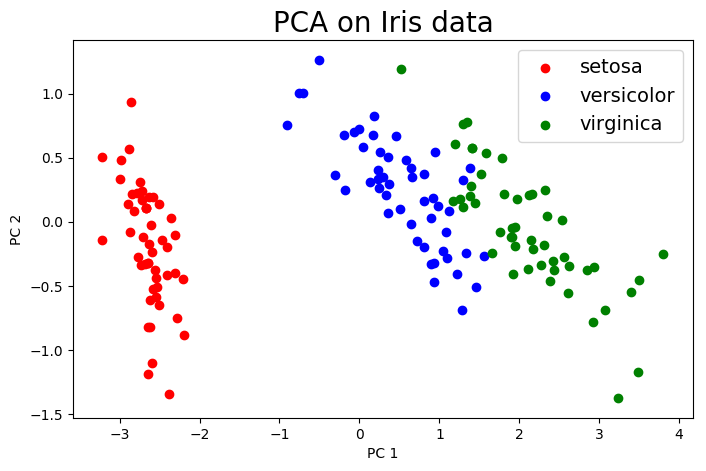

In [33]:
from sklearn.decomposition import PCA

pca_m =PCA(n_components=3).fit_transform(iris.data)

colors = ['red','blue','green']
plt.figure(figsize=(8,5))
for i in range(3):
    
    plt.scatter(pca_m[iris.target == i,0],pca_m[iris.target == i,1], 
                label = iris.target_names[i], c = colors[i])

plt.title("PCA on Iris data", fontsize = 20)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(fontsize =14)
plt.savefig("Iris_PCA.jpg")
plt.show()

## Dataframes 
### A short primer on Dataframes using Pandas

Arrays and vectors are incredibly powerful structures for numerical data analysis. In some languages, such as R, arrays and vectors are primary data types, which in large part explains the appeal of R for statistical data analysis - well, in fact that language has numerical data analysis as primary focus. Numpy has done much the same for Python, and Python for instance is quite popular in physics research and there is a trend that Python is replacing other languages/programming environments, such as Matlab.

Arrays and vectors, however, also show a fundamental limitation: they can only hold a single data type, and that data type is usually numerical. consider the following example:

In [34]:
my_list = ['some random string', 1, 0.3]
my_list

['some random string', 1, 0.3]

`my_list` is a list that holds three elements, each of different type: a string, integer, and float. Now consider what happens next:

In [35]:
np.array(my_list)

array(['some random string', '1', '0.3'], 
      dtype='|S18')

Numpy arrays always have a single type. Since one of the elements from the list is a string, that requires the rest to be of type string as well, because a string can not be converted (meaningfully) to a numerical value.

When we supply a list of integers, on the other hand, a numpy array of type integer can be made:

In [36]:
my_list= [1,1,1]
my_vector = np.array(my_list)
print my_vector.dtype 
my_vector

int64


array([1, 1, 1])

Note that by default integers in Python take 64 bits. If you have many integers in an array, say hundreds of millions, but each of the integers is small (smaller than 256, in fact), you can get away with explicitly converting to 8-bit integers. This saves 8 times the memory. This is important for working with bit-mapped pictures, but can also be relevant for DNA data, if you code your bases simply 0,1,2,3.

Now, again, numpy arrays can only have a single type, so when all values are numerical, but not all are integers:

In [37]:
my_list= [1.0,1,1]
my_vector = np.array(my_list)
print my_vector.dtype
my_vector

float64


array([ 1.,  1.,  1.])

So, arrays and vectors don't allow you to mix data types, but lists do. 

In practise, many of the data sets we are likely to encounter are organized in a column-separated fashion ('tables'), ie. have a 'matrix-like' lay-out, which could make them suitable for manipulation and computation in arrays. However, tables often have a mix of data types. Our Crane data set is a good case in point. To accomodate this type of dataset, you need to use the Data Frame. If that sounds arcane, it shouldn't. There is no doubt you have worked with data frames before. Just think of 'Excel sheets'.

Data frames are usually organized as a collection of named vectors or lists. Each column represents one data type, that holds for instance integers, and which has a name attached to it seperately which can be a string. Different columns can have different data types, such as string or float, but within each column, the data type is the same, allowing for optimal efficiency of working with the data per column. 

Data frames, like arrays, although internally always of compounded types, are basic data structures in some languages, such as R and Matlab. In Python too, it was recognized that with the Numpy and SciPy modules in place and very popular, there was a need to support dataframes. For this purpose the Pandas module was created. 

Like dataframes in other languages, the Pandas dataframe supports slicing and indexing, although the syntax to do that requires a bit of practice. However the same holds for languages like R, and, in fact, the dataframe syntax of Pandas is quite similar, although there are some quirks (although it can be argued that these quirks make the Pandas dataframe more easily sliceable than the R dataframes). Since the Pandas dataframe internally consists of Numpy vectors, all the mathematics tools and efficiency that people have come to love in Numpy are built into Pandas as well.

Let's start this part on Pandas with the Iris dataset, but now, instead of getting it from a built-in package, we'll load it directly from an excel sheet. 

*Caveat emptor: like with every strategy where you want to load an entire datastructure into memory, this could go south quite significantly if your dataset is huge. Like, seriously crashing your computer. So pay attention to the size of your input data. There are some interesting 'Out of Memory' solutions that are compatible with Pandas to deal with very large arrays, such as hdf5-based arrays, but these are several parsecs beyond the scope of this practical.*

In [38]:
import pandas as pd # the most accepted way of importing the pandas package


## Optional: A tiny demo of Cranes and Pandas

Remember that the 'Cranes' data has comma-separated values. Although not a tiny dataset, it is still small enough to be read entirely into a dataframe (there are certainly datasets in MoveDB that are WAY too big for this!).

Conveniently, Pandas has a function to read csv files:

In [39]:
Cranes = pd.read_csv("GPS_telemetry_of_Common_Cranes_Sweden.csv")

Looking at the first 10 lines will show you some familiar data.

In [40]:
Cranes.head()

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,gps:hdop,ground-speed,heading,tag-tech-spec,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,250386109,True,2013-07-12 04:10:14.000,13.352400,57.334150,NaN,NaN,NaN,NaN,NaN,NaN,gps,Grus grus,8621,8621,"GPS telemetry of Common Cranes, Sweden"
1,250386110,True,2013-07-12 04:24:05.000,13.352072,57.333359,210.0,1.7,0.257,0.0,3.0,4.18,gps,Grus grus,8621,8621,"GPS telemetry of Common Cranes, Sweden"
2,250386111,True,2013-07-12 04:38:51.000,13.352212,57.333355,203.0,8.3,0.257,0.0,3.0,4.18,gps,Grus grus,8621,8621,"GPS telemetry of Common Cranes, Sweden"
3,250386112,True,2013-07-12 04:53:33.000,13.352979,57.334042,-38.0,2.7,0.257,0.0,2.0,4.18,gps,Grus grus,8621,8621,"GPS telemetry of Common Cranes, Sweden"
4,250386113,True,2013-07-12 05:08:33.000,13.352137,57.333359,190.0,3.0,0.257,0.0,3.0,4.18,gps,Grus grus,8621,8621,"GPS telemetry of Common Cranes, Sweden"


Remember we made you count observations per bird by using a shell script? Let's do something similar, but now with Pandas. For this, we take all the IDs, turn them into a list, and count the number of occurences in a list. Python has a very handy tool for counting.

In [41]:
crane_ids = list(Cranes['individual-local-identifier'])
from collections import Counter
Counter(crane_ids)

Counter({47: 623,
         7558: 35262,
         8621: 17429,
         8647: 51055,
         8878: 4070,
         8886: 42197,
         8902: 2576,
         9175: 5730,
         9233: 53116,
         9381: 99397,
         9399: 2335,
         9407: 35099,
         9423: 5540,
         9449: 162,
         9456: 37286,
         9472: 61180,
         9480: 65753,
         9498: 688,
         9514: 2268,
         9613: 501})

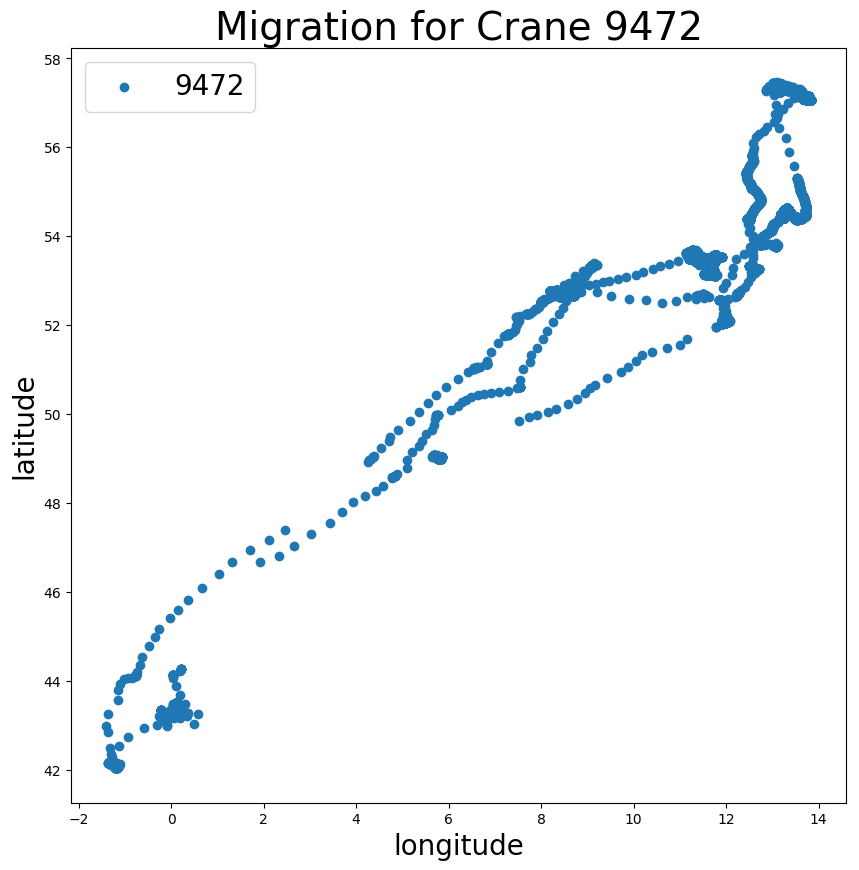

In [42]:

birdID = 9472
plt.figure(figsize = (10,10))

plt.scatter(Cranes.loc[Cranes['individual-local-identifier'] == birdID, 'location-long'],
            Cranes.loc[Cranes['individual-local-identifier'] == birdID, 'location-lat'],
           label = '%d' % (birdID))

plt.xlabel('longitude', fontsize = 20)
plt.ylabel('latitude', fontsize = 20)
plt.title('Migration for Crane %d' % (birdID), fontsize = 28)
plt.legend(fontsize = 20)
plt.show()

What does this plot show? What would you really like to have plotted as well? A map perhaps? Not to worry, if you are interested in this, you can make this into a project for the last week!

*Final note on Pandas: Pandas does have a built-in library for plotting. However, since there is already much that will be confusing even dealing with just one plotting method (and, as mentioned, even Matplotlib has already 2!) I don't want to bother you with it here. Furthermore, Matplotlibs options are far more extensive, and all the Pandas datastructures are compatible with Matplotlib anyway. *

## Further reading:
- [matplotlib website](https://matplotlib.org/)
- [matplotlib examples](https://matplotlib.org/gallery.html)
- [Pandas](http://pandas.pydata.org/)
- [Python data science handbook (O'Reilly) - recommended](http://a.co/2jL2pqf)
